<h1 style="color:#C4341A;"> Chargez les données dans votre Notebook 🌟</h1>


Dans cette exercice nous allons essayer de trouver le meilleur pays pour s'implémentater pour mettre a disposition des cour en ligne au niveau lycée et université.

<p style="color:#67B743; font-weight:bold;">Importation de panda</p>

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:#C4341A;">Importation EdStatsCountry-Series.csv </h2>

In [3]:
data_edSCS_csv = pd.read_csv('EdStatsCountry-Series.csv')

data_edSCS_csv.head() 

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [4]:
data_edSCS_csv.shape

(613, 4)

nous avons 613 lignes de pays, avec 4 variables différentes :

- CountryCode : Code ISO à trois lettres représentant un pays ou une région (par exemple, ABW pour Aruba, AFG pour l'Afghanistan).
- SeriesCode : Code unique identifiant un indicateur spécifique.
Exemple :
SP.POP.TOTL : Total de la population.
SP.POP.GROW : Taux de croissance de la population.
NY.GDP.PCAP.PP.CD : PIB par habitant en parité de pouvoir d'achat (PPA).
- DESCRIPTION : Description ou notes expliquative : indicateur.
- Unnamed:3 : Colonne inutile

### Suppression des colonnes inutiles

In [5]:
#Colonne inutile
data_edSCS_csv = data_edSCS_csv.drop(columns=['Unnamed: 3'])

### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [6]:
data_edSCS_csv.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

Toutes les cathégories sont de type objet ce qui est correct

### 2. Valeur manquante

In [7]:
data_edSCS_csv.isnull().sum()

CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64

Aucune erreur manquante par ce fait aucune action supplémentaire

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [8]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSCS_csv.isnull().sum()
total_values = data_edSCS_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64


Calcule de proportion des valeur manquante pour les avoir en pourcentage, ici 0% de valeur menquante pour l'intégralité des colonnes 

### 3. Doublon

On regarde si toutes les abréviations ne sont pas apparues en doublons. Nous allons regarder les abréviations en même temps que le SeriesCode car ce duo ne peux pas avoir de doublon il doit etre authentique 

In [9]:
data_edSCS_csv.loc[data_edSCS_csv[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

,CountryCode,SeriesCode,DESCRIPTION


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [10]:
data_edSCS_csv.drop_duplicates(subset=['CountryCode', 'SeriesCode'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. Mais dansnotre dataframe nous n'avons pas de donnée numérique, nous avons que des objets. Cela nest pas très utile pour ce DataFrame  

In [11]:
data_edSCS_csv.describe()

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


### 5. Calculez le nombre d'occurences de chaque colonne

In [12]:
columns = [
    'CountryCode',
    'SeriesCode'
]

for col in columns:
    print(f"{col} :")
    print(data_edSCS_csv[col].value_counts())
    print() 

CountryCode :
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

SeriesCode :
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64



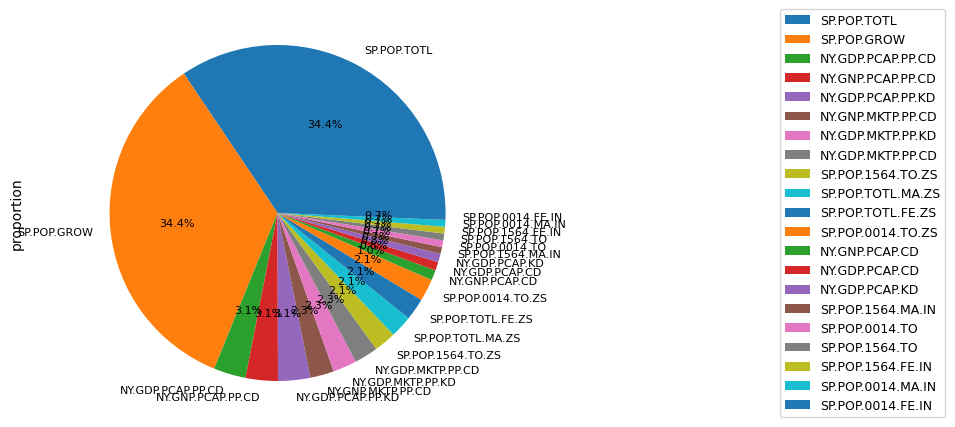

In [13]:
# Diagramme en secteurs
ax = data_edSCS_csv["SeriesCode"].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%', 
    fontsize=8         
)

ax.legend(
    labels=data_edSCS_csv["SeriesCode"].value_counts(normalize=True).index, 
    loc='center left',    
    bbox_to_anchor=(1.5, 0.5),  
    fontsize=9            
)

plt.axis('equal') 
plt.show() 


### 6. Création d'une liste 

In [14]:
#Netoyage Des pays
valid_countries = data_edSCS_csv['CountryCode'].tolist()

Création d'une liste des pays valide afin de pouvoir retiré les lignes contenant de faux pays

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsSeries </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>

In [15]:
data_edS_csv = pd.read_csv('EdStatsSeries.csv')

data_edS_csv.head() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_edS_csv.shape

(3665, 21)

nous avons 3665 ligne de pays, avec 21 variables différentes :

- SeriesCode : Le nom complet du pays.
- Topic : Le code abrégé à 3 lettres du pays, acronyme.
- Indicator Name : Le nom descriptif de l'indicateur, qui indique ce que la donnée représente.
- Source :
- Short definition

### Suppression des colonnes inutiles

In [17]:
#Colonne inutile
data_edS_csv = data_edS_csv.drop(columns=['Unnamed: 20'])

### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [18]:
data_edS_csv.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
dtype: object

Toutes les cathégories sont de type objet ce qui est correct

Toutes les cathégories sont de type objet ce qui est correct

### 2. Valeur manquante

In [19]:
data_edS_csv.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
dtype: int64

Aucune erreur manquante par ce fait aucune action supplémentaire

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [20]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edS_csv.isnull().sum()
total_values = data_edS_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


Calcule de proportion des valeur manquante pour les avoir en pourcentage, ici 0% de valeur menquante pour l'intégralité des colonnes 

### 3. Doublon

On regarde si toutes les abréviations ne sont pas apparues en doublons. Nous allons regarder les abréviations en même temps que le SeriesCode car ce duo ne peux pas avoir de doublon il doit etre authentique 

In [21]:
data_edS_csv.loc[data_edS_csv[['Series Code']].duplicated(keep=False),:]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [22]:
data_edS_csv.drop_duplicates(subset=['Series Code'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. 

In [23]:
data_edS_csv.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


### 5. Calculez le nombre d'occurences de chaque colonne

In [24]:
columns = [
    'Topic',
]

for col in columns:
    print(f"{col} :")
    print(data_edS_csv[col].value_counts())
    print() 

Topic :
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                          

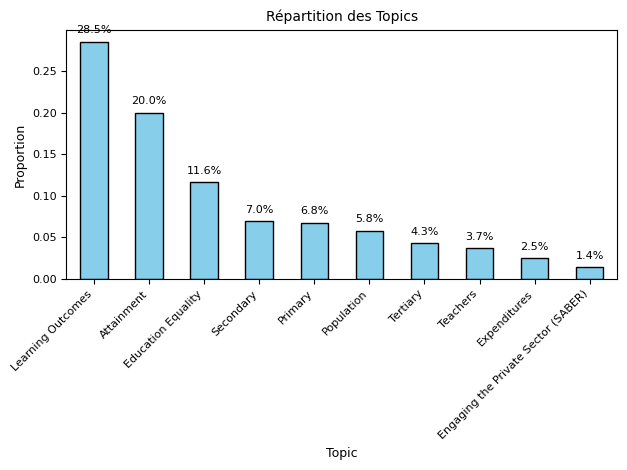

In [25]:
topic_counts = data_edS_csv["Topic"].value_counts(normalize=True)
topic_counts_filtered = topic_counts[topic_counts > 0.01]

ax = topic_counts_filtered.plot(
    kind='bar',
    fontsize=8,
    color='skyblue',
    edgecolor='black'
)

ax.set_title('Répartition des Topics', fontsize=10)
ax.set_xlabel('Topic', fontsize=9)
ax.set_ylabel('Proportion', fontsize=9)

for i, value in enumerate(topic_counts_filtered):
    ax.text(i, value + 0.01, f'{value:.1%}', ha='center', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Plus de 28% des Series Code	sont de sujet de reultat d'apprentissage :


- Learning Outcomes : Résultats d’apprentissage
- Attainment : Niveau d'éducation atteint par la population.
- Secondary, Tertiary : Niveaux éducatifs
- Education Equality : Identifier les égalités 
- Teachers : accès à l’éducation.
- Literacy : niveau d’alphabétisation.
- Expenditures : Dépenses en éducation


In [26]:
# Catégories pertinentes pour le projet
categories = [
    "Learning Outcomes", "Attainment", "Secondary", "Tertiary",
    "Education Equality", "Teachers", "Literacy", "Expenditures"
]

<h2 style="color:#C4341A;"> EdStatsCountry.csv </h2>

<hr style="border: 1px solid #C4341A;">

In [27]:
data_edSC_csv = pd.read_csv('EdStatsCountry.csv')

data_edSC_csv.head() 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


<hr style="border: 1px solid #C4341A;">

In [28]:
data_edSC_csv.shape

(241, 32)

nous avons 211 lignes de pays, avec 31 variables différentes :

- CountryCode : Code ISO à trois lettres représentant un pays ou une région (par exemple, ABW pour Aruba, AFG pour l'Afghanistan).
- Short Name : nom du pays


### Suppression des colonnes inutiles

In [29]:
#Colonne inutile
data_edSC_csv = data_edSC_csv.drop(columns=['Unnamed: 31'])

In [30]:
#Netoyage Des pays
#data_edSC_csv.drop(data_edSC_csv[data_edSC_csv['Short Name'] == 'Aruba'].index, inplace=True)
data_edSC_csv = data_edSC_csv[data_edSC_csv['Country Code'].isin(valid_countries)]

### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [31]:
data_edSC_csv.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

Toutes les cathégories sont de type objet ce qui est correct

- Latest population census 
- Latest household survey 
- Education indicators
- Government Accounting concept


### 2. Valeur manquante

In [32]:
data_edSC_csv.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                          0
Special Notes                                         92
Region                                                 1
Income Group                                           1
WB-2 code                                              1
National accounts base year                            7
National accounts reference year                     179
SNA price valuation                                   14
Lending category                                      68
Other groups                                         153
System of National Accounts                            0
Alternative conversion factor                        164
PPP survey year                

Aucune erreur manquante par ce fait aucune action supplémentaire

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [33]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSC_csv.isnull().sum()
total_values = data_edSC_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
2-alpha code                                          1.421801
Currency Unit                                         0.000000
Special Notes                                        43.601896
Region                                                0.473934
Income Group                                          0.473934
WB-2 code                                             0.473934
National accounts base year                           3.317536
National accounts reference year                     84.834123
SNA price valuation                                   6.635071
Lending category                                     32.227488
Other groups                                         72.511848
System of National Accounts                           0

Calcule de proportion des valeur manquante pour les avoir en pourcentage, ici 0% de valeur menquante pour l'intégralité des colonnes 

### 3. Doublon

On regarde si toutes les abréviations ne sont pas apparues en doublons. 

In [34]:
data_edSC_csv.loc[data_edSC_csv[['Country Code']].duplicated(keep=False),:]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [35]:
data_edSC_csv.drop_duplicates(subset=['Country Code'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. 

In [36]:
#Calcule statistique :
data_edSC_csv.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


### 5. Calculez le nombre d'occurences de chaque colonne

In [37]:
#calculez le nombre d'occurrences : 

columns = [
    'Government Accounting concept', 'IMF data dissemination standard',
    'Latest population census', 'Latest household survey',
    'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census',
    'Latest industrial data', 'Latest trade data',
    'Latest water withdrawal data'
]


for col in columns:
    count = data_edSC_csv[col].value_counts()
    print(f"Occurrences for '{col}':")
    print(count)
    print("-" * 40)  


Occurrences for 'Government Accounting concept':
Government Accounting concept
Consolidated central government    95
Budgetary central government       66
Name: count, dtype: int64
----------------------------------------
Occurrences for 'IMF data dissemination standard':
IMF data dissemination standard
General Data Dissemination System (GDDS)      110
Special Data Dissemination Standard (SDDS)     71
Name: count, dtype: int64
----------------------------------------
Occurrences for 'Latest population census':
Latest population census
2011                                                                                                                                                                              58
2010                                                                                                                                                                              49
2012                                                                                             

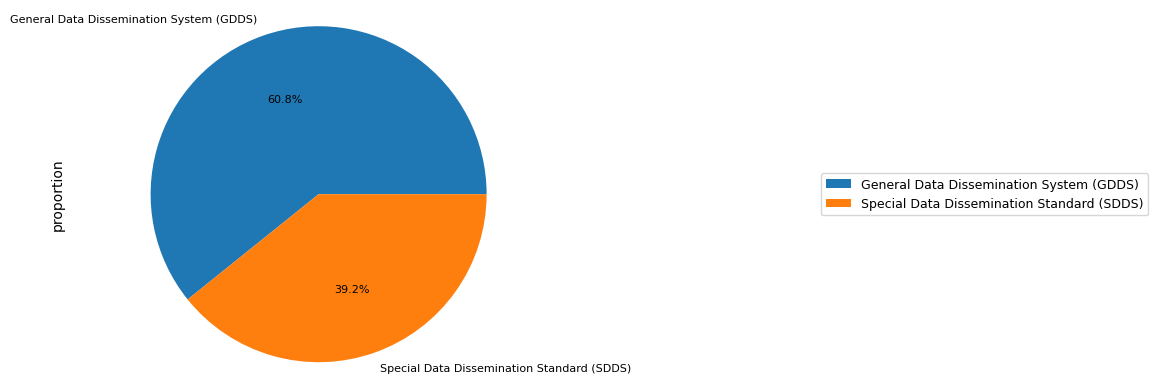

In [38]:
# Diagramme en secteurs
ax = data_edSC_csv["IMF data dissemination standard"].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%', 
    fontsize=8         
)

ax.legend(
    labels=data_edSC_csv["IMF data dissemination standard"].value_counts(normalize=True).index, 
    loc='center left',    
    bbox_to_anchor=(1.5, 0.5),  
    fontsize=9            
)


plt.axis('equal') 
plt.show() 


<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsData </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>



In [39]:
data_edSD_csv = pd.read_csv('EdStatsData.csv')

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data_edSD_csv.shape

(886930, 70)

nous avons 886930 ligne de pays, avec 70 variables différentes :

- Country Name : Le nom complet du pays.
- Country Code : Le code abrégé à 3 lettres du pays, acronyme.
- Indicator Name : Le nom descriptif de l'indicateur, qui indique ce que la donnée représente.
- Indicator Code :
- Dates : Correspond au moment où le pays posséde des données 

### Suppression des colonnes inutiles

In [41]:
#Colonne inutile
data_edSD_csv = data_edSD_csv.drop(columns=['Unnamed: 69'])

### Suppression des lignes inutiles

In [42]:
excluded_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]

columns_to_check = data_edSD_csv.columns.difference(excluded_columns)

data_edSD_csv = data_edSD_csv[data_edSD_csv[columns_to_check].notna().any(axis=1)]

data_edSD_csv.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [43]:
data_edSD_csv.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2080              float64
2085              float64
2090              float64
2095              float64
2100              float64
Length: 69, dtype: object

Toutes les cathégories sont de type objet ce qui est correct

Nous remarquons aussi que certain pays mentionnés sont de faux pays, ou des groupes de pays. DOnc nous allons garder que les vrais pays

In [44]:
data_edSD_csv = data_edSD_csv[data_edSD_csv['Country Code'].isin(valid_countries)]

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91631,Afghanistan,AFG,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,NaN,NaN,NaN,NaN,0.19066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Valeur manquante

In [45]:
data_edSD_csv.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              277967
                   ...  
2080              295381
2085              295381
2090              295381
2095              295381
2100              295381
Length: 69, dtype: int64

Beaucoup d'erreur manquante par ce fait des actions supplémentaires sont à réaliser, tel que l'aperçu du pourcentage de donnée manquante par colonne et si cela va au-dela de 90 % alors on supprime la colonne

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [46]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSD_csv.isnull().sum()
total_values = data_edSD_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1970              80.219273
                    ...    
2080              85.244828
2085              85.244828
2090              85.244828
2095              85.244828
2100              85.244828
Length: 69, dtype: float64


Calcule de proportion des valeur manquante pour les avoir en pourcentage. 
Nous remarquons que beaucoup de colonne posséde un taux élevé de donnée manquante, la plus élevé est l'année 2017 par ce fait nous allons les supprimer

In [47]:
columns_to_drop = percentage_missing[percentage_missing > 90].index
data_edSD_csv_cleaned = data_edSD_csv.drop(columns=columns_to_drop)

year_columns = [col for col in data_edSD_csv.columns if col.isdigit()]  

missing_values = data_edSD_csv[year_columns].isnull().sum()
total_values = len(data_edSD_csv)
percentage_missing_years = (missing_values / total_values) * 100

sorted_years = percentage_missing_years.sort_values()

top_5_years = sorted_years.head(5)

print(f"Colonnes supprimées : {list(columns_to_drop)}")

print("Les 5 années avec le moins de données manquantes :")
top_5_years.head()

Colonnes supprimées : ['1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '2016', '2017']
Les 5 années avec le moins de données manquantes :


2010    32.651677
2005    49.388905
2000    51.471968
2012    60.238839
2011    60.490492
dtype: float64

In [48]:
data_edSD_csv_cleaned.shape

(346509, 51)

### 3. Doublon

On regarde si tous les pays ne sont pas apparues en doublons. Nous allons regarder les abréviations en même temps que le SeriesCode car ce duo de donné ne peux être doublé

In [49]:
data_edSD_csv_cleaned.loc[data_edSD_csv[['Country Name','Country Code', 'Indicator Name', 'Indicator Code']].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [50]:
data_edSD_csv_cleaned.drop_duplicates(subset=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. 

In [51]:
#Calcule statistique :
data_edSD_csv_cleaned.describe()

,1970,1975,1980,1985,1990,1991,1992,1993,1994,1995,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,6.854200e+04,8.300500e+04,8.463700e+04,8.528700e+04,1.190220e+05,6.895800e+04,6.981600e+04,6.991800e+04,7.124000e+04,1.250610e+05,...,51128.000000,51128.000000,51128.000000,51128.000000,51128.000000,51128.000000,51128.00000,51128.000000,51128.000000,51128.000000
mean,3.309585e+08,3.843273e+08,5.531581e+08,6.243896e+08,1.537644e+09,2.749138e+09,2.823756e+09,2.903754e+09,2.988606e+09,1.810703e+09,...,353.556995,357.289588,359.411441,359.871759,358.876836,356.866900,354.21677,350.966970,346.988116,342.272427
std,2.290317e+10,2.514494e+10,3.239299e+10,3.964458e+10,6.388631e+10,8.613488e+10,8.910978e+10,9.219757e+10,9.596744e+10,7.606708e+10,...,5642.124206,5751.913931,5848.760371,5933.192043,5999.904457,6049.528174,6085.45823,6105.723882,6105.735658,6086.049083
min,-1.435564e+00,-3.658569e+00,-1.404240e+00,-2.216315e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,...,-1.830000,-1.630000,-1.440000,-1.260000,-1.090000,-0.920000,-0.78000,-0.650000,-0.550000,-0.450000
25%,8.000000e-01,1.300000e+00,1.640000e+00,2.000000e+00,4.630903e+00,6.012836e+01,5.234379e+01,5.308597e+01,5.007906e+01,5.000000e+00,...,0.030000,0.030000,0.030000,0.020000,0.020000,0.010000,0.01000,0.010000,0.010000,0.010000
50%,5.700000e+00,8.530000e+00,9.990000e+00,1.080116e+01,4.866242e+01,4.258550e+04,3.816650e+04,3.888800e+04,3.566300e+04,4.852000e+01,...,0.230000,0.230000,0.230000,0.230000,0.230000,0.230000,0.23000,0.230000,0.220000,0.220000
75%,5.302983e+01,6.890000e+01,7.201000e+01,7.120000e+01,8.068575e+04,3.987262e+05,3.885185e+05,3.939145e+05,3.871565e+05,6.957700e+04,...,7.492500,7.500000,7.405000,7.200000,7.000000,6.522500,5.90000,5.295000,4.500000,3.860000
max,4.779684e+12,5.451141e+12,6.529174e+12,7.686571e+12,9.251560e+12,9.244706e+12,9.573392e+12,9.836264e+12,1.023342e+13,1.051166e+13,...,606775.300000,644710.190000,675853.420000,700282.960000,717143.500000,727030.140000,731025.85000,728631.120000,719255.750000,703700.820000


### 5. Calculez le nombre d'occurences de chaque colonne

In [52]:
#calculez le nombre d'occurrences : 
cn = data_edSD_csv_cleaned['Country Name'].value_counts()
cc =data_edSD_csv_cleaned['Country Code'].value_counts()
iname = data_edSD_csv_cleaned['Indicator Name'].value_counts()
ic = data_edSD_csv_cleaned['Indicator Code'].value_counts()

print("Country Name : ", cn)
print("Country Code : ", cc)
print("Indicator Name : ", iname)
print("Indicator Code : ", ic)

Country Name :  Country Name
Colombia                    2462
Ghana                       2410
Kazakhstan                  2368
Cameroon                    2313
Moldova                     2303
                            ... 
Greenland                     59
Channel Islands               23
Faroe Islands                 17
Isle of Man                    8
Northern Mariana Islands       7
Name: count, Length: 211, dtype: int64
Country Code :  Country Code
COL    2462
GHA    2410
KAZ    2368
CMR    2313
MDA    2303
       ... 
GRL      59
CHI      23
FRO      17
IMN       8
MNP       7
Name: count, Length: 211, dtype: int64
Indicator Name :  Indicator Name
Population growth (annual %)                                                                            211
Population, total                                                                                       211
GDP at market prices (current US$)                                                                      208
Internet use

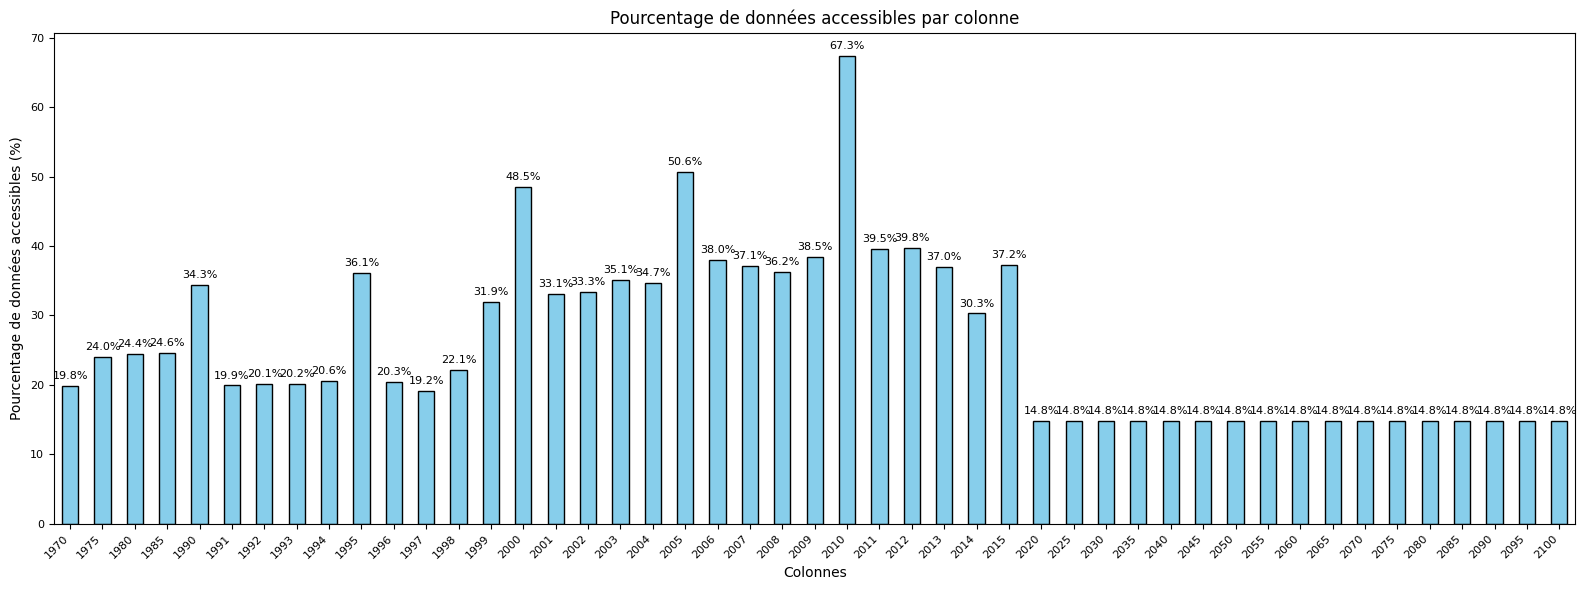

In [53]:
accessible_percentage = 100 - percentage_missing

columns_to_exclude = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
accessible_percentage = accessible_percentage.drop(columns_to_exclude, errors='ignore')

accessible_percentage = accessible_percentage[accessible_percentage > 10]

plt.figure(figsize=(16, 6))  

ax = accessible_percentage.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    fontsize=8
)

ax.set_title("Pourcentage de données accessibles par colonne", fontsize=12)
ax.set_xlabel("Colonnes", fontsize=10)
ax.set_ylabel("Pourcentage de données accessibles (%)", fontsize=10)

for i, value in enumerate(accessible_percentage):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Avoir des données future sur le long terme peut nous permettre de projeter, mais ceci est basé sur des prédictions  

### 6. donnée 2015

Nous voyons que l'année 2010 comporte le plus de donnée mais c'est donnée date de plusieurs années ce qui est a l'heure actuel est moins valorisantque des données plus récente comme l'année 2015. Nous allons plutôt prendre l'année 2015 la plus récente où nous aurons des données plus précise

In [54]:
columns_2015 = ["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2015"]

data = data_edSD_csv[columns_2015]

data.head()
#2015 Plus recent 

,Country Name,Country Code,Indicator Name,Indicator Code,2015
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN
91631,Afghanistan,AFG,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,NaN


Il est important de prendre en compte certain point, pour une formation en ligne il nous faut :

- Démographie : population totale, par tranches d’âge 20-29 ans, voire autres tranches d’âge
- Niveau éducation :  nombre et taux étudiants dans le secondaire et tertiaire
- Déploiement internet : Taux utilisation internet
- Economique : PIB, PIB / habitant, niveau de revenu

#### Enlever les NaN

In [55]:
excluded_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]

check = data.columns.difference(excluded_columns)

data = data[data[check].notna().any(axis=1)]

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015
91753,Afghanistan,AFG,All staff compensation as % of total expenditu...,UIS.XSPENDP.1.FDPUB.FNS,78.349113
91754,Afghanistan,AFG,All staff compensation as % of total expenditu...,UIS.XSPENDP.FDPUB.FNS,71.447098
91755,Afghanistan,AFG,All staff compensation as % of total expenditu...,UIS.XSPENDP.23.FDPUB.FNS,78.349113
91756,Afghanistan,AFG,All staff compensation as % of total expenditu...,UIS.XSPENDP.56.FDPUB.FNS,43.724129
92138,Afghanistan,AFG,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,35.034409


#### Prendres les 20 indicateurs les plus intéressant 

In [56]:
effectifs = data['Indicator Code'].value_counts()

n = len(data) 
frequences = effectifs / n

distribution_empirique = pd.DataFrame({
    'Effectifs': effectifs,
    'Fréquences': frequences
})

print(distribution_empirique)

                          Effectifs  Fréquences
Indicator Code                                 
SP.POP.TOTL                     210    0.001629
SP.POP.GROW                     210    0.001629
SE.PRM.DURS                     203    0.001574
SE.PRM.AGES                     203    0.001574
IT.NET.USER.P2                  201    0.001559
...                             ...         ...
UIS.AFR.PBR.1.G1.PU.READ          1    0.000008
UIS.AFR.PBR.1.PU.MATH             1    0.000008
UIS.AFR.PBR.1.G6.PU.MATH          1    0.000008
UIS.AFR.PBR.1.G5.PU.MATH          1    0.000008
UIS.AFR.PBR.1.G4.PU.MATH          1    0.000008

[2057 rows x 2 columns]


In [57]:
indicators = data['Indicator Code'].value_counts().head(20).index

data_filtered = data[data['Indicator Code'].isin(indicators)]

data_filtered.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015
92867,Afghanistan,AFG,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2.021272e+10
92868,Afghanistan,AFG,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.921556e+10
92869,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,5.991352e+02
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,5.695779e+02
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,8.260000e+00


In [58]:
ic = data_edSD_csv_cleaned['Indicator Code'].value_counts().head(20)

print("Indicator Code : ", ic)

Indicator Code :  Indicator Code
SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.MKTP.CD       208
IT.NET.USER.P2       208
NY.GDP.PCAP.CD       208
SE.SEC.ENRL.GC       206
SE.SEC.ENRL          206
SE.PRM.ENRL          206
SE.SEC.ENRL.VO       205
SE.SEC.ENRL.GC.FE    205
SE.PRM.AGES          205
UIS.THAGE.0          205
SE.PRM.ENRL.FE       205
UIS.THDUR.0          205
SE.PRE.ENRL          205
SE.PRM.DURS          205
UIS.E.1.G2           204
UIS.E.1.G3.F         204
UIS.E.1.G3           204
UIS.E.1.G2.F         204
Name: count, dtype: int64


Modalité | effectif

'SE.SEC.DURS'
    
- SP.POP.TOTL          : Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.

- SP.POP.GROW          : Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

- SE.PRM.DURS          : Number of grades (years) in primary education.

- SE.PRM.AGES          : Age at which students would enter primary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade.
  
- IT.NET.USER.P2       : Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.

- SE.SEC.DURS.LO       : 	Long definition
2293	Number of grades (years) in lower secondary education.

- UIS.THDUR.0          : 	Long definition
3552	Number of grades (years) in pre-primary education.

- SE.SEC.DURS          : 	Long definition
2292	Number of grades (years) in secondary education (ISCED 2 and 3).

- SE.SEC.DURS.UP       : 	Long definition
2294	Number of grades (years) in upper secondary education.

- SE.SEC.AGES          : 	Long definition
2288	Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade.

- UIS.THAGE.0          : Number of grades (years) in pre-primary education.

- UIS.THAGE.3.A.GPV    :	Long definition
3550	Age at which students would enter upper secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade.

- NY.GDP.MKTP.CD       : 	GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

- NY.GDP.PCAP.CD       :   GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

- NY.GDP.MKTP.KD       : 	GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

- NY.GDP.PCAP.KD       :	GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars.

- SH.DYN.MORT          : 	Long definition
2384	Under-five mortality rate is the probability per 1,000 that a newborn baby will die before reaching age five, if subject to age-specific mortality rates of the specified year.

- SP.POP.TOTL.FE.ZS    : 	Long definition
2593	Female population is the percentage of the population that is female. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

- SP.POP.TOTL.MA.ZS    : 	Long definition
2595	Male population is the percentage of the population that is male. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

- SP.POP.TOTL.FE.IN    : 	Long definition
2592	Female population is based on the de facto definition of population, which counts all female residents regardless of legal status or citizenship.

### Calculer la corrélation entre les indicateurs pour l'année 2015

In [59]:
individu = ['Country Name', 'Indicator Code', '2015']  
data_top = data_filtered[individu]

data_pivot = data_top.pivot(index='Country Name', columns='Indicator Code', values='2015')

correlation = data_pivot.corr()

correlation_sp_pop_totl = correlation['SP.POP.TOTL'].sort_values(ascending=False)

correlation_sp_pop_totl.head(20)

Indicator Code
SP.POP.TOTL          1.000000
SP.POP.TOTL.FE.IN    0.999889
NY.GDP.MKTP.CD       0.553056
NY.GDP.MKTP.KD       0.527675
SE.SEC.DURS.UP       0.070671
SP.POP.TOTL.MA.ZS    0.031646
SE.SEC.DURS          0.014266
SE.PRM.AGES          0.010422
UIS.THDUR.0          0.006189
SH.DYN.MORT         -0.001224
SP.POP.GROW         -0.025911
UIS.THAGE.0         -0.026397
SP.POP.TOTL.FE.ZS   -0.031646
SE.SEC.DURS.LO      -0.049573
NY.GDP.PCAP.KD      -0.054636
SE.SEC.AGES         -0.055826
IT.NET.USER.P2      -0.055935
NY.GDP.PCAP.CD      -0.056593
SE.PRM.DURS         -0.064182
UIS.THAGE.3.A.GPV   -0.101619
Name: SP.POP.TOTL, dtype: float64

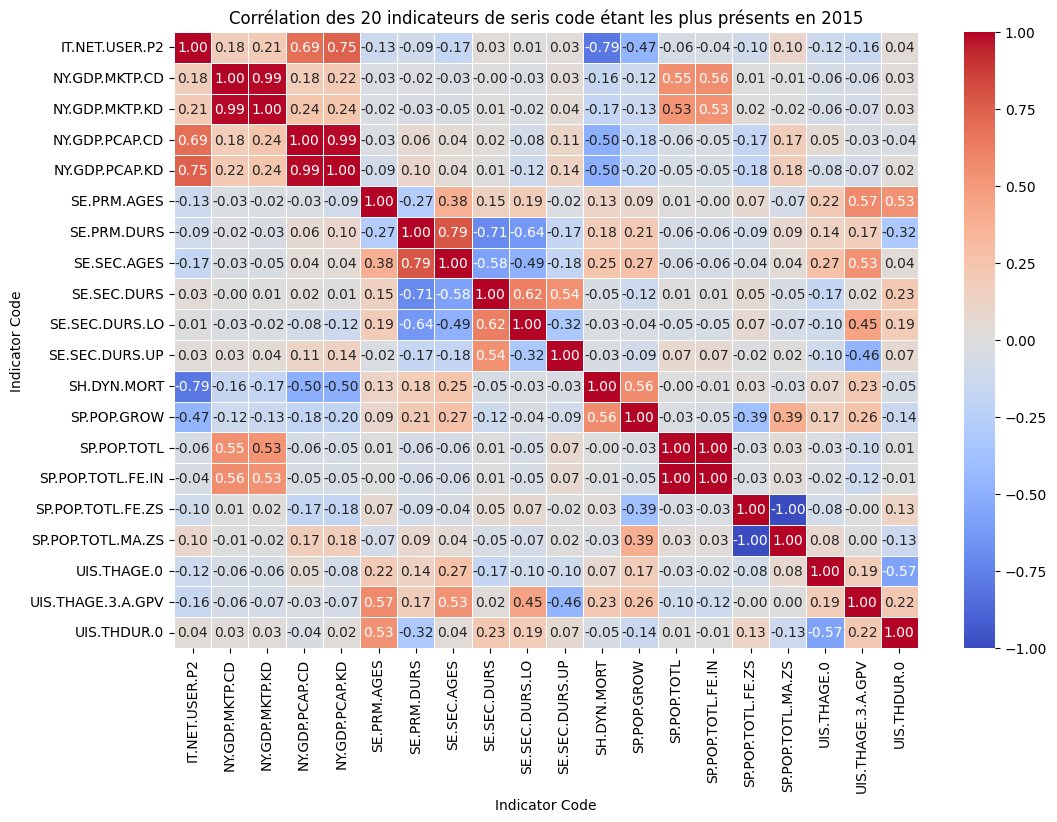

In [60]:
individu = data_filtered['Indicator Code'].value_counts().head(20).index

data_top = data[data['Indicator Code'].isin(individu)]

data_pivot= data_top.pivot(index='Country Name', columns='Indicator Code', values='2015')

correlation = data_pivot.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corrélation des 20 indicateurs de seris code étant les plus présents en 2015')
plt.show()

In [76]:
data_pivot_with_countries = data_pivot.copy()


relevant_indicators = [
    'IT.NET.USER.P2', 'SP.POP.GROW', 'SP.POP.TOTL', 
    'NY.GDP.PCAP.CD', 'SE.SEC.DURS', 'NY.GDP.MKTP.CD'
]

filtered_data = data_pivot_with_countries[relevant_indicators]

filtered_data = filtered_data.dropna(subset=relevant_indicators)

filtered_data.head()

Indicator Code,IT.NET.USER.P2,SP.POP.GROW,SP.POP.TOTL,NY.GDP.PCAP.CD,SE.SEC.DURS,NY.GDP.MKTP.CD
Country Name,,,,,,
Afghanistan,8.260000,2.943234,33736494.0,569.577923,6.0,1.921556e+10
Albania,63.252933,-0.291206,2880703.0,3934.895394,7.0,1.133526e+10
Algeria,38.200000,1.919959,39871528.0,4160.220067,7.0,1.658743e+11
Andorra,96.910000,-1.537836,78014.0,36038.267604,6.0,2.811489e+09
Angola,12.400000,3.428021,27859305.0,3695.793748,6.0,1.029622e+11


In [77]:
normalized_data = filtered_data.copy()

for indicator in relevant_indicators:
    min_value = normalized_data[indicator].min()
    max_value = normalized_data[indicator].max()
    normalized_data[indicator] = (normalized_data[indicator] - min_value) / (max_value - min_value)

normalized_data['Score'] = normalized_data[relevant_indicators].mean(axis=1)

# Trier les score
ranked_countries = normalized_data.sort_values('Score', ascending=False)

print(ranked_countries[['Score']].head(5))

Indicator Code     Score
Country Name            
United States   0.505025
Liechtenstein   0.482059
China           0.472820
Luxembourg      0.454064
Germany         0.450884


<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsFootNote </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>

In [63]:
data_edSFN_csv = pd.read_csv('EdStatsFootNote.csv')


data_edSFN_csv.head() 

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [64]:
data_edSFN_csv.shape

(643638, 5)

nous avons 773315 ligne de pays, avec 69 variables différentes :

- SeriesCode : Le nom complet du pays.
- Country Code : Le code abrégé à 3 lettres du pays, acronyme.
- Year : Le nom descriptif de l'indicateur, qui indique ce que la donnée représente.
- DESCRIPTION :

### Suppression des colonnes inutiles

In [65]:
#Colonne inutile
data_edSFN_csv = data_edSFN_csv.drop(columns=['Unnamed: 4'])

### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [66]:
data_edSFN_csv.dtypes

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

Toutes les cathégories sont de type objet ce qui est correct

Nous remarquons aussi que certain pays mentionnés sont de faux pays, ou des groupes de pays. DOnc nous allons garder que les vrais pays

In [67]:
#Netoyage Des pays
#data_edSC_csv.drop(data_edSC_csv[data_edSC_csv['Short Name'] == 'Aruba'].index, inplace=True)

data_edSFN_csv = data_edSFN_csv[data_edSFN_csv['CountryCode'].isin(valid_countries)]

data_edSFN_csv.head() 

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


Toutes les cathégories sont de type objet ce qui est correct

### 2. Valeur manquante

In [68]:
data_edSFN_csv.isnull().sum()

CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64

Aucune erreur manquante par ce fait aucune action supplémentaire

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [69]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSFN_csv.isnull().sum()
total_values = data_edSFN_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64


Calcule de proportion des valeur manquante pour les avoir en pourcentage, ici 0% de valeur menquante pour l'intégralité des colonnes 

### 3. Doublon

On regarde si toutes les abréviations ne sont pas apparues en doublons. Nous allons regarder les abréviations en même temps que le SeriesCode car ce duo ne peux pas avoir de doublon il doit etre authentique 

In [70]:
data_edSFN_csv.loc[data_edSFN_csv[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643632,ZWE,SH.DYN.MORT,YR2004,Uncertainty bound is 90.7 - 107.8
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [71]:
data_edSFN_csv.drop_duplicates(subset=['CountryCode', 'SeriesCode'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. 

In [72]:
#Calcule statistique :
data_edSFN_csv.describe()

,CountryCode,SeriesCode,Year,DESCRIPTION
count,65032,65032,65032,65032
unique,210,1545,54,558
top,KWT,SE.PRM.AGES,YR1999,UNESCO Institute for Statistics (UIS) estimate
freq,621,205,10839,25703


### 5. Calculez le nombre d'occurences de chaque colonne

In [73]:
columns = [
    'CountryCode',
    'SeriesCode'
]

for col in columns:
    print(f"{col} :")
    print(data_edSFN_csv[col].value_counts())
    print() 

CountryCode :
CountryCode
KWT    621
TTO    578
BEN    577
HKG    565
LBN    546
      ... 
CHI     15
IMN      8
XKX      3
FRO      2
MNP      1
Name: count, Length: 210, dtype: int64

SeriesCode :
SeriesCode
SE.PRM.AGES            205
SE.PRM.DURS            205
SE.PRM.ENRL            204
SE.SEC.DURS            204
SE.SEC.ENRL            204
                      ... 
LO.PIAAC.TEC.P90         1
LO.PIAAC.TEC.P75         1
LO.PIAAC.TEC.P50         1
LO.PIAAC.TEC.P25         1
LO.TIMSS.SCI4.BL.FE      1
Name: count, Length: 1545, dtype: int64



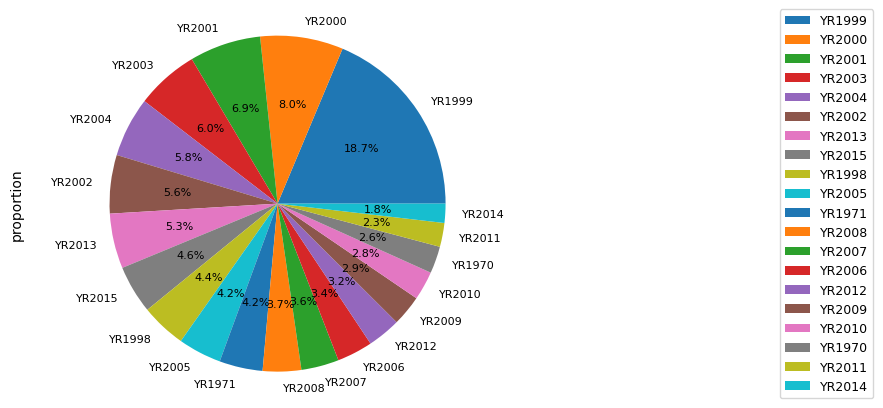

In [74]:
year_counts = data_edSFN_csv["Year"].value_counts(normalize=True)
year_counts_filtered = year_counts[year_counts > 0.01]

# Diagramme en secteurs
ax = year_counts_filtered.plot(
    kind='pie',
    autopct='%1.1f%%', 
    fontsize=8         
)

ax.legend(
    labels=year_counts_filtered.index, 
    loc='center left',    
    bbox_to_anchor=(1.5, 0.5),  
    fontsize=9            
)

plt.axis('equal') 
plt.show() 
